In [1]:
from enum import Enum

from icecream import ic

import sys
sys.path.insert(0, "../scripts")

import fem_calc as fc
import fem_helpers as h

from shapely import *

import numpy as np

import matplotlib.pyplot as plt
import shapely.plotting as splt

from pprint import pprint

In [2]:
h.DE9IMPattern.CELL_ADJ.value

'FF2F11212'

In [14]:
f1 = fc.FEM_Calc()
# _ = f1.generate_and_subs()



# pprint(f1.cells_nb)

In [15]:
np.unique([cell.area for cell in f1.cells.values()])

array([0.13850416, 0.13850416, 0.13850416, 0.27700831, 0.27700831,
       0.27700831, 0.27700831, 0.27700831, 0.27700831, 0.27700831,
       0.27700831, 0.55401662, 0.55401662, 0.55401662, 0.55401662,
       0.55401662, 0.55401662, 0.55401662, 0.55401662])

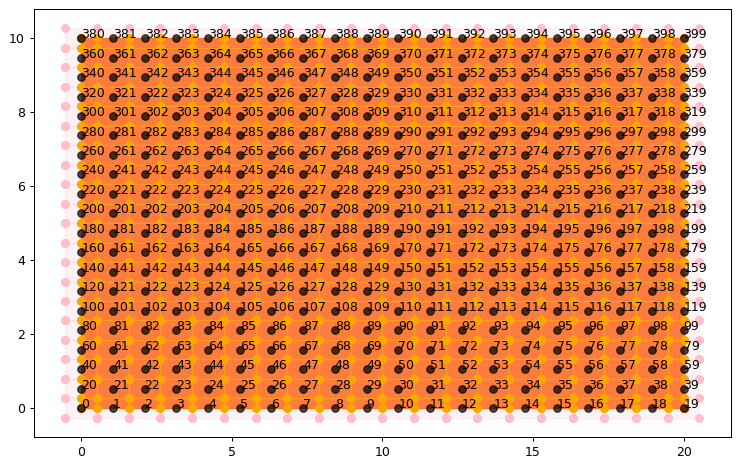

In [4]:
GM = (np.sqrt(5)-1.0)/2.0
W = 10
H = W*GM
SIZE = (W, H)

fig = plt.figure(figsize=SIZE,  dpi=90)
ax = fig.add_subplot(111)


# splt.plot_polygon(amb_poly, ax=ax, alpha=0.7, color="blue")
splt.plot_polygon(f1.room_poly, ax=ax, alpha=0.7, color="red")



for cell in f1.cells_untrimmed:
    splt.plot_polygon(cell, ax=ax, alpha=0.2, color="pink")

for (name, cell), pt in zip(f1.cells.items(),f1.room_pts):
    splt.plot_polygon(cell, ax=ax, alpha=0.4, color="orange")
    ax.annotate(name, pt)


splt.plot_points(MultiPoint(f1.room_pts), ax=ax, alpha=0.7, color="black")

In [5]:
len(f1.cells_untrimmed)

400

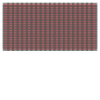

In [6]:
MultiPolygon(f1.cells_untrimmed)

In [7]:
np.unique(np.array([np.round(cell.area,12) for cell in f1.cells_untrimmed]))

array([0.55401662])

In [8]:
# f1.solve()

In [9]:
f1.create_cell_eq(1)

Eq(0, 0.5*delta_x*delta_y*edot + 2.0*delta_x*k*(-T1 + T21)/delta_y + 0.5*delta_y*k*(T0 - T1)/delta_x + 0.5*delta_y*k*(-T1 + T2)/delta_x)

In [10]:
f1.create_cell_eq(6)

Eq(0, 0.5*delta_x*delta_y*edot + 2.0*delta_x*k*(T26 - T6)/delta_y + 0.5*delta_y*k*(-T6 + T7)/delta_x)

In [11]:
f1.create_cell_eq(0)

Eq(0, 0.25*delta_x*delta_y*edot + 1.0*delta_x*k*(-T0 + T20)/delta_y + 0.5*delta_y*h*(-T0 + T_ininity) + 0.5*delta_y*k*(-T0 + T1)/delta_x)

In [12]:
f1.create_cell_eq(21)

Eq(0, 1.0*delta_x*delta_y*edot + 1.0*delta_x*k*(T1 - T21)/delta_y + 1.0*delta_x*k*(-T21 + T41)/delta_y + 1.0*delta_y*k*(T20 - T21)/delta_x + 1.0*delta_y*k*(-T21 + T22)/delta_x)